In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from numpy import e

# Problema 1. Derivada por 5 puntos

In [2]:
adelante_5 = lambda f,x,h: (-25*f(x) +48*f(x+h) -36*f(x+ 2*h) +16*f(x+ 3*h) -3*f(x +4*h))/(12*h)
centrada_5 = lambda f,x,h: (f(x-2*h) -8*f(x-h) +8*f(x+h) -f(x+2*h))/(12*h)
atras_5 = lambda f,x,h: (25*f(x) -48*f(x+h) +36*f(x+ 2*h) -16*f(x+ 3*h) +3*f(x +4*h))/(12*h)

def five_point_derivative(f, xList, h):

    n = len(xList)
    df=[]

    for i in range(n):

        x = xList[i]

        if i == 0:
            df.append(adelante_5(f, x, h))
        elif i == n-1:
            df.append(atras_5(f, x, h))
        else:
            df.append(centrada_5(f, x, h))
    
    return(df)

In [3]:
f_P1 = lambda x: np.cos(x)
df_P1 = lambda x: -np.sin(x)
df2_P1 = lambda x: -np.sin(x)

x_P1 = np.linspace(0, 2*np.pi, 10)
y_P1 = f_P1(x_P1)

x_punto = np.pi/8
dyReal_punto = df_P1(x_punto)
dy2Real_punto =df2_P1(x_punto)

dy2_5puntod_P1_h1 = CubicSpline(x_P1, five_point_derivative(df_P1, x_P1, 0.1), bc_type= 'natural')(x_punto)
error_h1 = abs(dy2Real_punto - dy2_5puntod_P1_h1)

dy2_5puntod_P1_h2 = CubicSpline(x_P1, five_point_derivative(df_P1, x_P1, 0.05), bc_type= 'natural')(x_punto)
error_h2 = abs(dy2Real_punto - dy2_5puntod_P1_h2)

dy2_5puntod_P1_h3 = CubicSpline(x_P1, five_point_derivative(df_P1, x_P1, 0.01), bc_type= 'natural')(x_punto)
error_h3 = abs(dy2Real_punto - dy2_5puntod_P1_h2)

h_pruebas = np.linspace(0.01, 0.5, 10)[::-1]

error = []
valor = []

for h in h_pruebas:
    dy_punto_5Puntos = CubicSpline(x_P1, five_point_derivative(f_P1, x_P1, h), bc_type= 'natural')(x_punto)

    valor.append(np.round(dy_punto_5Puntos, 4))
    error.append(np.round(abs(dy_punto_5Puntos - dyReal_punto), 4))

h_errores = {f'dy, valor real: {round(dyReal_punto, 4)}': valor}
h_errores['h']= np.round(h_pruebas, 4)
h_errores['error (%)'] = error

h_errores = pd.DataFrame(h_errores)
display(h_errores)

print(
    f'La sgunda derivada con un h = {0.05} fue de: {dy2_5puntod_P1_h2} con un error de: {error_h2}\n'
    f'Usando un h menor (h = {0.1}) fue de: {dy2_5puntod_P1_h1} con un error de: {error_h1}, un cambio de {error_h2 - error_h1} frente al de h=0.05\n'
    f'Usando un h mayor (h = {0.01}) fue de: {dy2_5puntod_P1_h3} con un error de: {error_h3}, un cambio de {error_h2 - error_h3} frente al de h=0.05'
    )

,"dy, valor real: -0.3827",h,error (%)
0,-0.3787,0.5000,0.0040
1,-0.3803,0.4456,0.0024
2,-0.3813,0.3911,0.0014
3,-0.3819,0.3367,0.0008
4,-0.3822,0.2822,0.0005
5,-0.3824,0.2278,0.0003
6,-0.3824,0.1733,0.0002
7,-0.3825,0.1189,0.0002
8,-0.3825,0.0644,0.0002
9,-0.3825,0.0100,0.0002


La sgunda derivada con un h = 0.05 fue de: -0.9020085967375638 con un error de: 0.5193251643724741
Usando un h menor (h = 0.1) fue de: -0.9020006557950043 con un error de: 0.5193172234299146, un cambio de 7.940942559514497e-06 frente al de h=0.05
Usando un h mayor (h = 0.01) fue de: -0.9020091305409332 con un error de: 0.5193251643724741, un cambio de 0.0 frente al de h=0.05


Segun parece el error no cambio si h disminuye, a diferencia de cuando aumenta

# Punto 2. derivadas

In [4]:
adelante = lambda f,x,h: (f(x+h) - f(x))/h
centrada = lambda f,x,h: (f(x+h) - f(x-h))/(2*h)
atras = lambda f,x,h: (f(x) - f(x-h))/h

#Segunda derivada
centrada2 = lambda f,x,h: (f(x+h) - 2*f(x) + f(x-h))/h**2

#Diferencias finitas
def finita(f, xList, h, orden= 1):

    n = len(xList)
    df=[]

    for i in range(n):

        x = xList[i]

        if orden == 1:
            if i == 0:
                df.append(adelante(f, x, h))
            elif i == n-1:
                df.append(atras(f, x, h))
            else:
                df.append(centrada(f, x, h))
        else:
            if i == 0 or i == n-1:
                df.append(None)  
            else:
                df.append(centrada2(f, x, h))
    return(df)

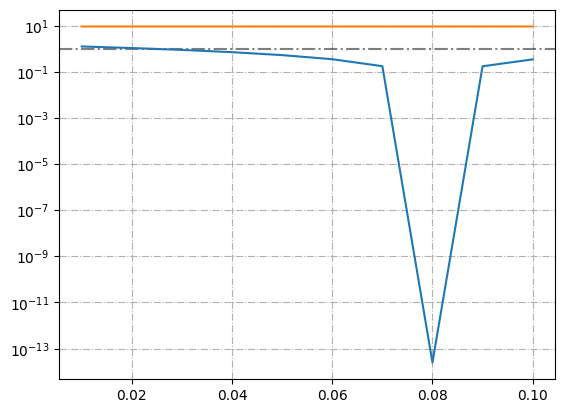

In [34]:
f_P2 = lambda x: x*e**x

x_P2 = np.linspace(1.8, 2.2, 6)
y_P2 = f_P2(x_P2)

df1_P2 = np.gradient(y_P2, x_P2)
df2_P2 = np.gradient(df1_P2, x_P2)

h_values = np.linspace(0.01, 0.1, 10)

errores_df1 = np.zeros(len(h_values))
errores_df2 = np.zeros(len(h_values))
i = 0

for h in h_values:

    df1_dif_finitas = finita(f_P2, x_P2, h)
    df2_dif_finitas = finita(f_P2, x_P2, h, orden= 2)
    df2_dif_finitas = np.array(df2_dif_finitas, dtype=float)

    error_df1 = max(abs(df1_P2 - df1_dif_finitas))
    error_df2 = np.nanmax(abs(df2_P2 - df2_dif_finitas))

    errores_df1[i] = error_df1
    errores_df2[i] = error_df2

    i += 1

plt.axhline(1, color= 'Black', linestyle= '-.', alpha= 0.5)

plt.semilogy(h_values, errores_df1)
plt.semilogy(h_values, errores_df2)

plt.grid(linestyle= '-.')

Se puede ver que el error para la primera derivada tiene orden cercano a -1, sin embargo hay un salto grande cuando h esta cerca a 0.08 donde el orden salta a -13

A parte se puede ver que la precision es muy mala para la segunda derivada